## Import Dataset

In [1]:
import pandas as pd

attributes = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']

dataset = pd.read_csv('data/glass.data', names=attributes)

print(dataset.shape[0], 'records')
dataset.head()

214 records


,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Data Preprocessing

### Separate Features and Label

In [2]:
X = dataset.drop(['Id','Type'], axis=1)
y = dataset['Type']

print('Features:\n', X)
print('\nLabel:\n', y)

Features:
           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]

Label:
 0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64


### Split data into Training and Test sets

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print('Training data:', len(X_train))
print('Test data:', len(X_test))

Training data: 171
Test data: 43


### Normalize the feature set

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Dimensionality Reduction

### Principal Component Analysis

In [5]:
from sklearn.decomposition import PCA

pca_ = PCA()

X_train_ = pca_.fit_transform(X_train)
X_test_ = pca_.transform(X_test)

### Find the variance ratios of each principal component

In [6]:
explained_variances = pca_.explained_variance_ratio_

i=1
print('Variance % of principal components:\n')
for v in explained_variances:
    print('PC'+str(i), float(v)*100)
    i+=1

Variance % of principal components:

PC1 27.984201016028372
PC2 22.99658418680011
PC3 15.178480426262498
PC4 13.533617802759224
PC5 9.85827919213483
PC6 5.529001115624951
PC7 4.141466552377225
PC8 0.7589338046125045
PC9 0.01943590340029523


### Plot PC vs Cummulative Variance

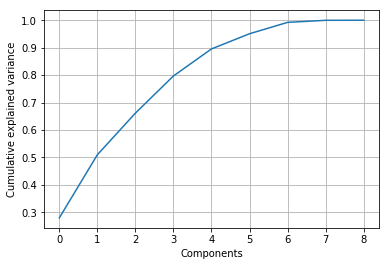

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
plt.plot(np.cumsum(explained_variances))
plt.xticks(range(0,9))
plt.xlabel('Components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()
fig.savefig('PCA.png')

## Create, Train and Evaluate model with Principal Components

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

pc = 5
print('Principal Components:', pc)

pca = PCA(n_components=pc)

X_train_pc = pca.fit_transform(X_train)
X_test_pc = pca.transform(X_test)

classifier = RandomForestClassifier(random_state=0)

grid_params = {
    'n_estimators': [10, 20, 40, 60, 80, 100],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]  
}

grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=grid_params,
    scoring='accuracy',
    cv=5, # number of folds
    n_jobs=-1 # all available computing power
)

grid_search.fit(X_train_pc, y_train)

best_parameters = grid_search.best_params_
print('\nBest parameters:\n', best_parameters)

best_result = grid_search.best_score_
print('\nBest training accuracy:', '{0:.2f}%'.format(best_result*100))

model = grid_search.best_estimator_

y_pred = model.predict(X_test_pc)

acc = accuracy_score(y_test, y_pred)
print('\nTest Accuracy:', '{0:.2f}%'.format(acc*100))

cm = confusion_matrix(y_test, y_pred)
print('\nConfusion matrix:\n', cm)

Principal Components: 5

Best parameters:
 {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 60}

Best training accuracy: 69.03%

Test Accuracy: 74.42%

Confusion matrix:
 [[10  1  0  0  0  0]
 [ 2 10  1  0  0  1]
 [ 2  1  0  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  2  1]
 [ 0  1  0  0  0  7]]
